In [7]:
import pandas as pd
file_path = 'transcoding_mesurment.tsv'
df = pd.read_csv(file_path, delimiter='\t')
print(df)

                id   duration  codec  width  height  bitrate  framerate    i  \
0      04t6-jw9czg  130.35667  mpeg4    176     144    54590  12.000000   27   
1      04t6-jw9czg  130.35667  mpeg4    176     144    54590  12.000000   27   
2      04t6-jw9czg  130.35667  mpeg4    176     144    54590  12.000000   27   
3      04t6-jw9czg  130.35667  mpeg4    176     144    54590  12.000000   27   
4      04t6-jw9czg  130.35667  mpeg4    176     144    54590  12.000000   27   
...            ...        ...    ...    ...     ...      ...        ...  ...   
68779  ZWEN-71BqPs  972.27100   h264    480     360   278822  29.000000  560   
68780  zWQN-bqqg0o  129.88100    vp8    640     480   639331  30.162790   36   
68781  zX17-vi0sqQ  249.68000    vp8    320     240   359345  25.068274  129   
68782  zyiT-TzxIpk  183.62334   h264   1280     720  2847539  29.000000   98   
68783  zZKo-QsY86U  294.61334  mpeg4    176     144    55242  12.000000   61   

           p  b  ...    p_size  b_size 

In [8]:
df.head()

id   duration  codec  width  height  bitrate  framerate   i     p  \
0  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
1  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
2  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
3  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   
4  04t6-jw9czg  130.35667  mpeg4    176     144    54590       12.0  27  1537   

   b  ...  p_size  b_size    size  o_codec  o_bitrate o_framerate  o_width  \
0  0  ...  825054       0  889537    mpeg4      56000        12.0      176   
1  0  ...  825054       0  889537    mpeg4      56000        12.0      320   
2  0  ...  825054       0  889537    mpeg4      56000        12.0      480   
3  0  ...  825054       0  889537    mpeg4      56000        12.0      640   
4  0  ...  825054       0  889537    mpeg4      56000        12.0     1280   

   o_height   umem  utime  
0       144  22508  0.612  
1       240  25164  0.980  
2       360  29228  1.216  
3       480  34316  1.692  
4       720  58528  3.456  

[5 rows x 22 columns]

In [52]:
data = df.iloc[1:,1:-1]
target = df.iloc[1:,-1]

In [58]:
import numpy as np
df_encoded_codec = pd.get_dummies(data, columns=['codec'], prefix='codec', dtype=np.int16)
df_encoded_codec.drop(['o_codec'], axis=1, inplace=True)
columns_from_codec = df_encoded_codec.columns
df_encoded_o_codec = pd.get_dummies(data, columns=['o_codec'], prefix='o_codec', dtype=np.int16)
df_encoded_o_codec.drop(['codec'], axis=1, inplace=True)
columns_from_o_codec = df_encoded_o_codec.columns.difference(columns_from_codec)
df_encoded = pd.concat([df_encoded_codec, df_encoded_o_codec[columns_from_o_codec]], axis=1)
print("\nPo kodowaniu:")
pd.set_option('display.max_columns', None)
df_encoded.head()


Po kodowaniu:


duration  width  height  bitrate  framerate   i     p  b  frames  i_size  \
1  130.35667    176     144    54590       12.0  27  1537  0    1564   64483   
2  130.35667    176     144    54590       12.0  27  1537  0    1564   64483   
3  130.35667    176     144    54590       12.0  27  1537  0    1564   64483   
4  130.35667    176     144    54590       12.0  27  1537  0    1564   64483   
5  130.35667    176     144    54590       12.0  27  1537  0    1564   64483   

   p_size  b_size    size  o_bitrate  o_framerate  o_width  o_height    umem  \
1  825054       0  889537      56000         12.0      320       240   25164   
2  825054       0  889537      56000         12.0      480       360   29228   
3  825054       0  889537      56000         12.0      640       480   34316   
4  825054       0  889537      56000         12.0     1280       720   58528   
5  825054       0  889537      56000         12.0     1920      1080  102072   

   codec_flv  codec_h264  codec_mpeg4  codec_vp8  o_codec_flv  o_codec_h264  \
1          0           0            1          0            0             0   
2          0           0            1          0            0             0   
3          0           0            1          0            0             0   
4          0           0            1          0            0             0   
5          0           0            1          0            0             0   

   o_codec_mpeg4  o_codec_vp8  
1              1            0  
2              1            0  
3              1            0  
4              1            0  
5              1            0

Ponieważ w danych, 2 kolumny zawierały wartości nie liczbowe za pomocą One-Hot Encoding zamieniliśmy je odpowiednio w kolumny (ilość nowych kolumn taka jak ilość różnych wartości w nieliczbowych kolumnach) dzięki czemu uzyskane dane nadaja się do poddania ich regresji (wszytskie cechy maja wartości liczbowe)

In [59]:
data_np = np.array(df_encoded, dtype=np.int16)
target_np = np.array(target, dtype=np.int16)

print(data_np.shape)
print(target_np.shape)

(68783, 26)
(68783,)


In [60]:
print(data_np[1,:])

[   130    176    144 -10946     12     27   1537      0   1564  -1053
 -26914      0 -27967  -9536     12    480    360  29228      0      0
      1      0      0      0      1      0]


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Załóżmy, że 'data_np' to cechy, a 'target_np' to etykiety
# Podziel dane na zbiory treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(data_np, target_np, test_size=0.4, random_state=12)

# Standaryzacja
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# Normalizacja
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

# Standaryzacja i Normalizacja
scaler_minmax_std = MinMaxScaler()
X_train_minmax_std = scaler_minmax_std.fit_transform(X_train_std)
X_test_minmax_std = scaler_minmax_std.transform(X_test_std)

model_std = LinearRegression()
model_minmax = LinearRegression()
model_minmax_std = LinearRegression()

# Dopasuj modele
model_std.fit(X_train_std, y_train)
model_minmax.fit(X_train_minmax, y_train)
model_minmax_std.fit(X_train_minmax_std,y_train)

# Przewiduj dla zbiorów testowych
y_pred_std = model_std.predict(X_test_std)
y_pred_minmax = model_minmax.predict(X_test_minmax)
y_pred_minmax_std = model_minmax_std.predict(X_test_minmax_std)

# Ocen jakość modelu
mse_std = mean_squared_error(y_test, y_pred_std)
mse_minmax = mean_squared_error(y_test, y_pred_minmax)
mse_minmax_std = mean_squared_error(y_test,y_pred_minmax_std)

print(f'MSE dla standaryzacji: {mse_std}')
print(f'MSE dla normalizacji: {mse_minmax}')
print(f'MSE dla normalizacji i standaryzacji: {mse_minmax_std}')

MSE dla standaryzacji: 125.60501144216522
MSE dla normalizacji: 125.59749292095118
MSE dla normalizacji i standaryzacji: 125.60789720119757


In [85]:
from sklearn.metrics import r2_score
print('Standaryzacja: %.2f' % r2_score(y_test, model_std.predict(X_test_std)))
print('Normalizacja: %.2f' % r2_score(y_test, model_minmax.predict(X_test_minmax)))
print('Standaryzacja i Normalizacja: %.2f' % r2_score(y_test, model_minmax_std.predict(X_test_minmax_std)))

Standaryzacja: 0.51
Normalizacja: 0.51
Standaryzacja i Normalizacja: 0.51


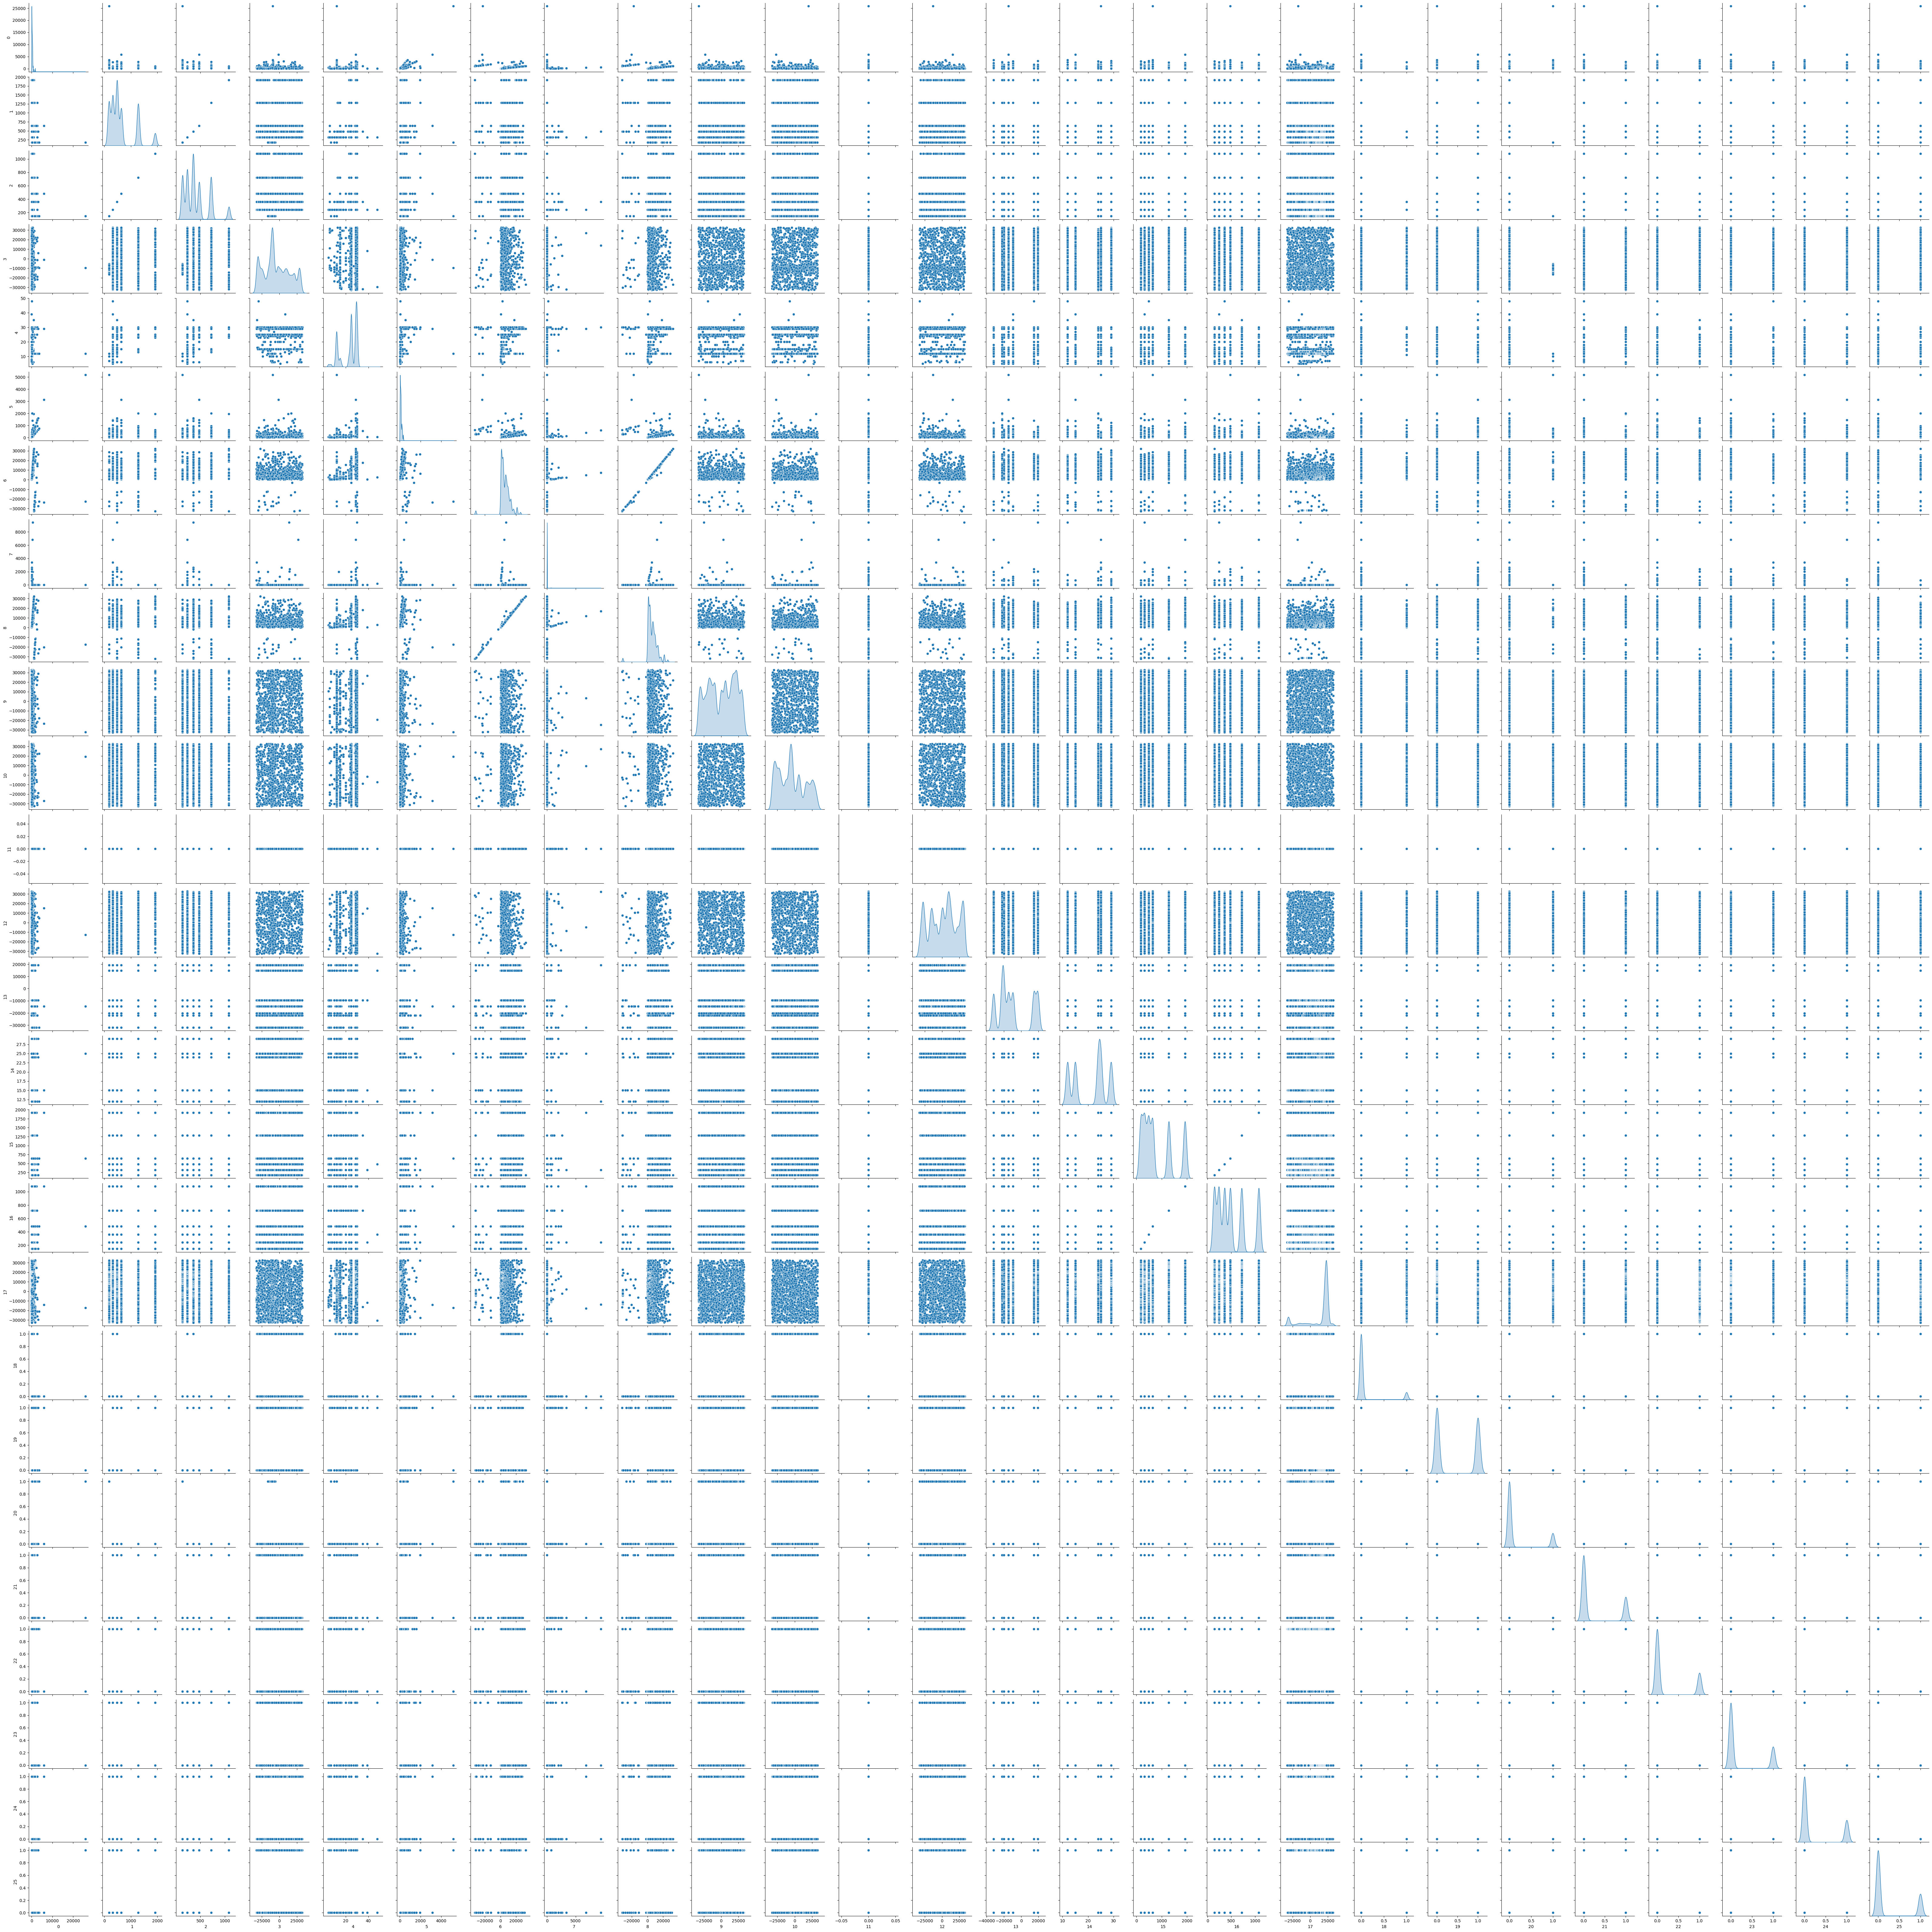

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

data_pd = pd.DataFrame(data_np)
sns.pairplot(data_pd,diag_kind="kde")

In [78]:
std = StandardScaler()
train_data = scaler_std.fit_transform(data_np)
print(train_data)

[[-0.54273423 -0.96928701 -1.11621485 ... -0.57478176  1.72574491
  -0.57916893]
 [-0.54273423 -0.96928701 -1.11621485 ... -0.57478176  1.72574491
  -0.57916893]
 [-0.54273423 -0.96928701 -1.11621485 ... -0.57478176  1.72574491
  -0.57916893]
 ...
 [-0.12845053 -0.6583833  -0.7172344  ... -0.57478176 -0.57945992
  -0.57916893]
 [-0.35822132  1.41430812  1.27766785 ... -0.57478176  1.72574491
  -0.57916893]
 [ 0.02821138 -0.96928701 -1.11621485 ...  1.73979078 -0.57945992
  -0.57916893]]


In [80]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), df_encoded, target_np, cv=15)
print(scores)

[0.40832026 0.64935781 0.69587261 0.67034633 0.68156    0.69173233
 0.60684813 0.70890501 0.64354555 0.66599349 0.68147276 0.67739349
 0.57127871 0.49168006 0.51762212]


polynomial features i rekursywna elminacja  zrob